### Μηχανική Μάθηση
#### 1η ατομική εργασία
ΣΗΜΜΥ- ΕΜΠ -Ακ. Έτος 2023-24



Ονοματεπώνυμο φοιτητή: Παναγιώτης Μπέλσης

Α.Μ.: 03120874

### 1. Εισαγωγή συνόλου δεδομένων

Tο σύνολο δεδομένων για το training-validation μπορείτε να το κατεβάσετε από [εδώ](https://drive.google.com/file/d/1_ndkaT6BoDuxxPPxLWq-oKDJqzO1Dlhg/view?usp=sharing) .


1.α. Φορτώστε το σύνολο δεδομένων "train-val.csv"  στο notebook σας.

In [391]:
from google.colab import files
upload_file =files.upload()

Saving train-val.csv to train-val (9).csv


In [392]:
import pandas as pd
import io

df = pd.read_csv('train-val.csv')
df.head()

,id,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,1,2009-03-04,Albury,13.8,22.1,0.2,NaN,NaN,WNW,57.0,...,57.0,26.0,1014.5,1013.1,NaN,NaN,15.6,21.9,0.0,0.0
1,2,2009-03-05,Albury,11.5,22.0,0.0,NaN,NaN,SW,50.0,...,60.0,33.0,1013.7,1011.8,NaN,NaN,13.9,21.4,0.0,0.0
2,3,2009-03-09,Albury,13.8,31.8,0.0,NaN,NaN,NNE,24.0,...,49.0,28.0,1019.7,1015.9,NaN,NaN,18.6,30.5,0.0,0.0
3,4,2009-03-10,Albury,15.5,32.0,0.0,NaN,NaN,NE,50.0,...,51.0,25.0,1019.5,1016.2,NaN,NaN,20.1,30.8,0.0,1.0
4,5,2009-03-11,Albury,18.4,30.5,1.2,NaN,NaN,NE,44.0,...,57.0,23.0,1021.3,1018.0,NaN,NaN,21.5,29.6,1.0,0.0


### 2. Διερευνητική ανάλυση δεδομένων -Exploratory Data Analysis (EDA)
Χρησιμοποιήστε code cells  με τις κατάλληλες τεχνικές EDA για την κατανόηση του συνόλου δεδομένων και text cells για επεξήγηση των αποτελεσμάτων.

Χρησιμοποιώντας τις κατάλληλες μεθόδους παρουσιάστε με χρήση κώδικα πληροφορίες για τα εξής:

2α. το πλήθος των δειγμάτων και των χαρακτηριστικών του συνόλου δεδομένων,

2β. το είδος των χαρακτηριστικών του συνόλου δεδομένων,  

2γ. τις ετικέτες των χαρακτηριστικών,

2δ. το πλήθος των κατηγοριών,

2ε. πόσα δείγματα ανήκουν σε κάθε κατηγορία,

2στ. τη συσχέτιση μεταξύ των δεδομένων,

2ζ. οποιαδήποτε άλλη πληροφορία πιστεύετε ότι είναι χρήσιμη για την κατανόηση του συνόλου δεδομένων.

In [393]:
#2α
samples, features = df.shape
print(f"Number of Samples: {samples}")
print(f"Number of features: {features}")

Number of Samples: 48423
Number of features: 24


In [394]:
#2β
data_types = df.dtypes
print(data_types)

id                 int64
Date              object
Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday        float64
RainTomorrow     float64
dtype: object


In [395]:
#2γ
column_labels = df.columns.tolist()
print(column_labels)

['id', 'Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'RainToday', 'RainTomorrow']


In [396]:
#2δ
num_categories = df['Location'].nunique()
print(f"Number of categories: {num_categories}")

Number of categories: 49


In [397]:
#2ε
samples_per_category = df['Location'].value_counts()
print(samples_per_category)

Sydney              1145
Canberra            1136
Darwin              1107
Perth               1104
MelbourneAirport    1099
Brisbane            1098
Hobart              1096
Adelaide            1064
Sale                1054
MountGambier        1053
Mildura             1048
CoffsHarbour        1046
PerthAirport        1044
Woomera             1044
Bendigo             1042
Cobar               1038
Wollongong          1034
Cairns              1032
SalmonGums          1031
Townsville          1027
Portland            1022
Penrith             1021
Dartmoor            1021
Watsonia            1021
SydneyAirport       1017
Ballarat            1014
WaggaWagga          1013
Launceston          1011
Newcastle           1007
Witchcliffe         1004
AliceSprings        1004
Nuriootpa           1004
Albany               999
Tuggeranong          993
NorahHead            991
GoldCoast            987
Albury               985
Richmond             983
NorfolkIsland        981
BadgerysCreek        981


In [398]:
#2στ
correlation_matrix = df.corr()
print(correlation_matrix)

                     id   MinTemp   MaxTemp  Rainfall  Evaporation  Sunshine  \
id             1.000000  0.104771  0.136331 -0.024047     0.096221  0.078911   
MinTemp        0.104771  1.000000  0.715692  0.096510     0.457483  0.053477   
MaxTemp        0.136331  0.715692  1.000000 -0.103864     0.586798  0.469859   
Rainfall      -0.024047  0.096510 -0.103864  1.000000    -0.069284 -0.210261   
Evaporation    0.096221  0.457483  0.586798 -0.069284     1.000000  0.351482   
Sunshine       0.078911  0.053477  0.469859 -0.210261     0.351482  1.000000   
WindGustSpeed  0.047488  0.163349  0.013580  0.160382     0.194751 -0.051283   
WindSpeed9am   0.062482  0.193476  0.003229  0.102262     0.208774 -0.001514   
WindSpeed3pm   0.040819  0.183079  0.054409  0.068231     0.154487  0.055941   
Humidity9am   -0.129400 -0.232420 -0.485241  0.217506    -0.521304 -0.471021   
Humidity3pm   -0.085483  0.021193 -0.504320  0.258283    -0.392778 -0.634892   
Pressure9am   -0.104157 -0.372295 -0.224

<ipython-input-398-c1b0f1dd4f4e>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


In [399]:
#2ζ
missing_values = df.isnull().sum()
print("\nMissing values per feature:")
print(missing_values)


Missing values per feature:
id                   0
Date                 0
Location             0
MinTemp            160
MaxTemp            101
Rainfall             0
Evaporation      20384
Sunshine         22997
WindGustDir       3121
WindGustSpeed     3093
WindDir9am        3821
WindDir3pm        1328
WindSpeed9am       357
WindSpeed3pm       857
Humidity9am        558
Humidity3pm       1259
Pressure9am       4780
Pressure3pm       4789
Cloud9am         17890
Cloud3pm         18981
Temp9am            226
Temp3pm            913
RainToday            0
RainTomorrow         0
dtype: int64


### 3. Προεπεξεργασία συνόλου δεδομένων

*   Στοιχείο λίστας
*   Στοιχείο λίστας


💡`Χρησιμοποιήστε το Column Transformer για τη δημιουργία και την εφαρμογή χωριστών μετασχηματιστών για αριθμητικά και κατηγορικά δεδομένα.`




3.α.  Θα χρησιμοποιήσετε όλα τα χαρακτηριστικά του συνόλου δεδομένων για την εκπαίδευση των ταξινομητών ή θα επιλέξετε κάποια από αυτά;  Θα κάνετε κάποια συνένωση κάποιων χαρακτηριστικών για δημιουργία νέων χαρακτηριστικών για το μοντέλο σας;


In [400]:
#df['Date'] = pd.to_datetime(df['Date']) #
#df['Month'] = df['Date'].dt.month # kaname correlation_matrix gia to month kai den ephrreaze shmantika to Raintomorrow, opote kaname drop
df.drop(['id','MinTemp','Temp9am','Date'], axis=1, inplace=True) # η συσχετιση σε σχεση με το RainTomorrow ειναι πολυ μικρη
df['AvgMaxTemp'] = df[['MaxTemp', 'Temp3pm']].mean(axis=1) # κανω συνενωση το average των MaxTemp και Temp3pm
df.drop(['MaxTemp','Temp3pm'], axis=1, inplace=True) # σβηνω τα Temp3pm, MaxTemp, αρα μενει μονο το AvgMaxTemp
#df.info()


In [401]:
missing_values = df.isnull().sum()
print("\nMissing values per feature:")
print(missing_values)


Missing values per feature:
Location             0
Rainfall             0
Evaporation      20384
Sunshine         22997
WindGustDir       3121
WindGustSpeed     3093
WindDir9am        3821
WindDir3pm        1328
WindSpeed9am       357
WindSpeed3pm       857
Humidity9am        558
Humidity3pm       1259
Pressure9am       4780
Pressure3pm       4789
Cloud9am         17890
Cloud3pm         18981
RainToday            0
RainTomorrow         0
AvgMaxTemp          56
dtype: int64


3.β. Υπάρχουν απουσιάζουσες τιμές; Γράψτε κατάλληλο κώδικα ώστε να χειριστείτε αυτές τις τιμές.

In [402]:
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest, chi2

# handle numeric features
numeric_features = df.select_dtypes(include=['number']).columns
numeric_features = numeric_features.drop(['RainToday', 'RainTomorrow'])

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')) # ftiaxnw ta missing values me ton median
    ,('scaler', StandardScaler())])               # 3.δ) κλιμάκωση (κανονικοποιηση σε κλιμακα 0-1)

# handle categorical features
categorical_features = df.select_dtypes(include=['object']).columns
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')), # 3.β) ii) απουσιάζουσες τιμές
    ('scaler', OneHotEncoder(handle_unknown='ignore'))])  # 3.γ) μετατροπή των κατηγορικών μεταβλητών

# Create a transformer
preprocessor = ColumnTransformer( # 3.ε)δημιουργία και εφαρμογή χωριστών μετασχηματιστών
    transformers=[
        ('num', numeric_transformer, numeric_features), #αριθμητικά
        ('cat', categorical_transformer, categorical_features)]#κατηγορικά δεδομένα
        , remainder='passthrough'  #για features που δεν προσδιοριζονται
    )

# Fit and transform the data
df_transformed = preprocessor.fit_transform(df) # 3.ε)
#το df_transformed περιέχει τα μετασχηματισμένα δεδομένα

feature_names = preprocessor.get_feature_names_out()# βλεπουμε τα αρχικα ονοματα των columns στο csv

# Convert the sparse matrix to a DataFrame
df_transformed_dense = pd.DataFrame(df_transformed.toarray(), columns=feature_names) # 3.ε)


3.γ. Γράψτε κώδικα για την κατάλληλη μετατροπή των κατηγορικών μεταβλητών ώστε να μπορούν να τους διαχειριστούν οι ταξινομητές που θα χρησιμοποιήσετε.

In [403]:
#βλ 3β

3.δ. Γράψτε κώδικα για την κλιμάκωση των χαρακτηριστικών, αν την θεωρείτε απαραίτητη

In [404]:
#βλ 3β

3.ε. Εκτελέστε όλα τα προηγούμενα βήμα προεκπαίδευσης (χρήση μετασχηματιστών) ώστε να είναι "καθαρό" το αρχικό σύνολο για να χρησιμοποιηθεί για την εκπαίδευση των ταξινομητών.

In [405]:
#βλ 3β

3.στ. Αφού έχετε "καθαρίσει" το αρχικό σύνολο εκπαίδευσης, γράψτε τον κατάλληλο κώδικα ώστε από το αρχικό σύνολο εκπαίδευσης να δημιουργήσετε τα σύνολα Χ και y.

💡 `Η στήλη 'RainTomorrow' είναι η τιμή που θέλουμε να προβλέψει ο ταξινομητής μας.`



In [406]:
column_to_exclude = 'remainder__RainTomorrow'
y = df_transformed_dense[column_to_exclude]# output = RainTomorrow
X = df_transformed_dense.drop(columns=[column_to_exclude])#input = columns-RainTomorrow
X.shape, y.shape

((48423, 111), (48423,))

3.ζ. Διαχωρίστε το σύνολο δεδομένων σε σύνολο εκπαίδευσης (train set) και σε σύνολο επικύρωσης (validation set) (ο διαχωρισμός να είναι train set 70% και validation set 30%).


In [407]:
from sklearn.model_selection import train_test_split

RAND_STATE = 42
  # Split into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=RAND_STATE)

### 4. Εκπαίδευση μοντέλου με default τιμές στις παραμέτρους των ταξινομητών

Θα εκπαιδεύσουμε τους ακόλουθους ταξινομητές με το σύνολο εκπαίδευσης των δεδομένων μας:
1. Naive Bayes
2. KNeighborsClassifier
3. LogisticRegression
4. MLP με ένα κρυφό επίπεδο
5. SVC
6. Decision Tree
7. Random Forest


 4.α. Εκπαιδεύστε (fit)  και τους  7 ταξινομητές που προαναφέρθηκαν (εμφανίστε τα δείγματα από το train set μαζί με την ετικέτα τους στην είσοδο του κάθε ταξινομητή), χρησιμοποιώντας τις default τιμές για όλες τις παραμέτρους τους.

In [408]:
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Εκπαίδευση Naive Bayes
nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train)
print("Naive Bayes done")

# Εκπαίδευση KNeighborsClassifier
knn_classifier = KNeighborsClassifier()
knn_classifier.fit(X_train, y_train)
print("\nKNeighborsClassifier done")

# Εκπαίδευση Logistic Regression
lr_classifier = LogisticRegression()
lr_classifier.fit(X_train, y_train)
print("\nLogistic Regression done")

# Εκπαίδευση MLP με ένα κρυφό επίπεδο
mlp_classifier = MLPClassifier(hidden_layer_sizes=(1,))
mlp_classifier.fit(X_train, y_train)
print("\nMLP Classifier - Training set samples and labels:")

# Εκπαίδευση SVC
svc_classifier = LinearSVC()
svc_classifier.fit(X_train, y_train)
print("\nLinearSVC - Training set samples and labels:")

# Εκπαίδευση Decision Tree
dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(X_train, y_train)
print("\nDecision Tree - Training set samples and labels:")

# Εκπαίδευση Random Forest
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train, y_train)
print("\nRandom Forest - Training set samples and labels:")

Naive Bayes done

KNeighborsClassifier done


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



Logistic Regression done

MLP Classifier - Training set samples and labels:


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(



LinearSVC - Training set samples and labels:

Decision Tree - Training set samples and labels:

Random Forest - Training set samples and labels:


4.β. Εφαρμόστε στα εκπαιδευμένα μοντέλα από το validation set μόνο τα δείγματα χωρίς την ετικέτα τους (predict).


In [409]:
y_pred_nb = nb_classifier.predict(X_test)
print("\nNaive Bayes - predictions made")

y_pred_knn = knn_classifier.predict(X_test)
print("\nKNN - predictions made")

y_pred_lr = lr_classifier.predict(X_test)
print("\nLR - predictions made")

y_pred_mlp = mlp_classifier.predict(X_test)
print("\nMLP - predictions made")

y_pred_svc = svc_classifier.predict(X_test)
print("\nLinearSVC - predictions made")

y_pred_dt = dt_classifier.predict(X_test)
print("\nDT - predictions made")

y_pred_rf = rf_classifier.predict(X_test)
print("\nRF - predictions made")


Naive Bayes - predictions made

KNN - predictions made

LR - predictions made

MLP - predictions made

LinearSVC - predictions made

DT - predictions made

RF - predictions made



4.γ. Συγκρίνετε την έξοδο του κάθε μοντέλου σε σχέση με τις αντίστοιχες ετικέτες του validation set και αξιολογήστε την επιδοσή τους χρησιμοποιώντας το F1 score.


In [410]:
from sklearn.metrics import f1_score

# nb
nb_f1_score = f1_score(y_test, y_pred_nb, average='binary')
print(f'nb_classifier F1 score: {nb_f1_score}')

# knn
knn_f1_score = f1_score(y_test, y_pred_knn, average='binary')
print(f'knn_classifier F1 score: {knn_f1_score}')

# lr
lr_f1_score = f1_score(y_test, y_pred_lr, average='binary')
print(f'lr_classifier F1 score: {lr_f1_score}')

# mlp
mlp_f1_score = f1_score(y_test, y_pred_mlp, average='binary')
print(f'mlp_classifier F1 score: {mlp_f1_score}')

# svc
svc_f1_score = f1_score(y_test, y_pred_svc, average='binary')
print(f'svc_classifier F1 score: {svc_f1_score}')

# dt
dt_f1_score = f1_score(y_test, y_pred_dt, average='binary')
print(f'dt_classifier F1 score: {dt_f1_score}')

# rf
rf_f1_score = f1_score(y_test, y_pred_rf, average='binary')
print(f'rf_classifier F1 score: {rf_f1_score}')

nb_classifier F1 score: 0.47530307584410386
knn_classifier F1 score: 0.5793678360541855
lr_classifier F1 score: 0.6272600834492351
mlp_classifier F1 score: 0.6263221779087913
svc_classifier F1 score: 0.617288315361499
dt_classifier F1 score: 0.5452135493372607
rf_classifier F1 score: 0.6204537270435723


4.δ.  Αξιολογήστε συνολικά την επίδοση των μοντέλων χρησιμοποιώντας κάποιο γράφημα (π.χ. ιστόγραμμα, bar plot) και σχολιάστε ποιο μοντέλο είχε την καλύτερη επίδοση.


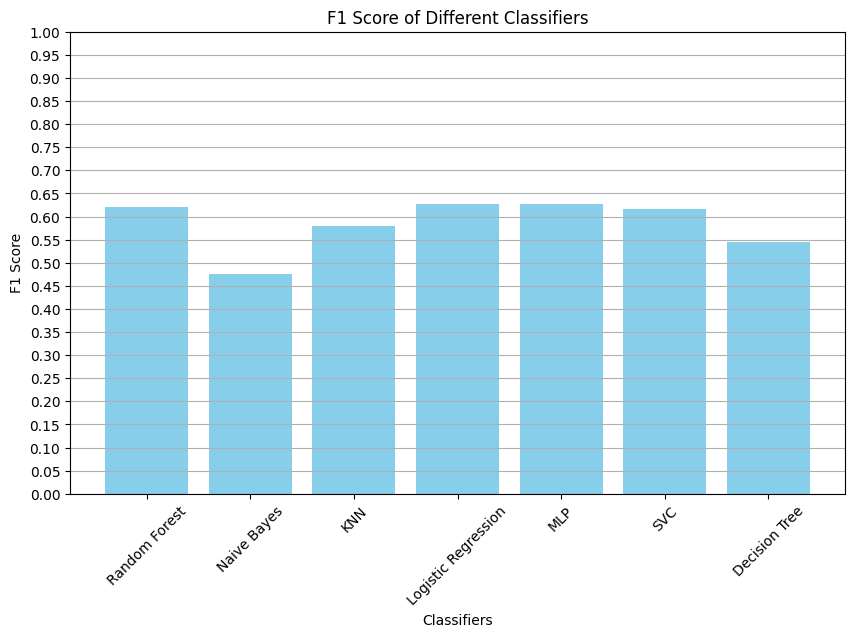

In [411]:
import matplotlib.pyplot as plt

classifiers = ['Random Forest', 'Naive Bayes', 'KNN', 'Logistic Regression', 'MLP', 'SVC', 'Decision Tree']
f1_score = [rf_f1_score,nb_f1_score,knn_f1_score,lr_f1_score,mlp_f1_score,svc_f1_score,dt_f1_score]

plt.figure(figsize=(10, 6))
plt.bar(classifiers, f1_score, color='skyblue')
plt.xlabel('Classifiers')
plt.ylabel('F1 Score')
plt.title('F1 Score of Different Classifiers')
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.yticks([i/20 for i in range(21)]) # anevainei ana 0.05 o y
plt.grid(axis='y')

plt.show()


O Random Forest φαινεται να είναι το καλύτερο μοντέλο με 0.86 accuracy.

### 5. Προετοιμασία αρχείου για την πρώτη υποβολή στο kaggle

5.α. Χρησιμοποιήστε **ΜΟΝΟ** το μοντέλο σας με την καλύτερη επίδοση για να κάνετε προβλέψεις, χρησιμοποιώντας το [test set](https://drive.google.com/file/d/1bcmuoeRVY0y5ZuY6nZcmzy8_5fOFR4Oa/view?usp=drive_link).


In [412]:
from google.colab import files
upload_file =files.upload()

Saving test.csv to test (7).csv


In [413]:
test = pd.read_csv('test.csv')

# morfopoihsh tou test wste na exei thn idia morfh me to test
#df['Date'] = pd.to_datetime(df['Date']) #
#df['Month'] = df['Date'].dt.month # kaname correlation_matrix gia to month kai den ephrreaze shmantika to Raintomorrow, opote kaname drop
test.drop(['MinTemp','Temp9am','Date'], axis=1, inplace=True) # η συσχετιση σε σχεση με το RainTomorrow ειναι πολυ μικρη
test['AvgMaxTemp'] = test[['MaxTemp', 'Temp3pm']].mean(axis=1) # κανω συνενωση το average των MaxTemp και Temp3pm
test.drop(['MaxTemp','Temp3pm'], axis=1, inplace=True) # σβηνω τα Temp3pm, MaxTemp, αρα μενει μονο το AvgMaxTemp


# handle numeric features
numeric_features = test.select_dtypes(include=['number']).columns
numeric_features = numeric_features.drop(['RainToday'])
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median'))
    ,('scaler', StandardScaler())])               # 3.δ) κλιμάκωση

# handle categorical features
categorical_features = test.select_dtypes(include=['object']).columns
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')), # 3.β) ii) απουσιάζουσες τιμές
    ('scaler', OneHotEncoder(handle_unknown='ignore'))])  # 3.γ) μετατροπή των κατηγορικών μεταβλητών

# Create a transformer
preprocessor = ColumnTransformer( # 3.ε)
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)]
        , remainder='passthrough'  # Handle columns not specified in transformers
    )

# Fit and transform the data
test_transformed = preprocessor.fit_transform(test) # 3.ε)

# Now, df_transformed contains the transformed data without the need for np.array conversion

# Retrieve feature names after transformation
feature_names = preprocessor.get_feature_names_out()

# Convert the sparse matrix to a DataFrame
test_transformed_dense = pd.DataFrame(test_transformed.toarray(), columns=feature_names) # 3.ε)

y_test_pred_mlp = mlp_classifier.predict(test_transformed_dense)
print("\nmlp - predictions made")


mlp - predictions made


5.β. Αποθηκεύστε τις προβλέψεις από το καλύτερο μοντέλο σας σε ένα csv αρχείο. To csv αρχείο θα πρέπει να είναι περιέχει 2 στήλες: η πρώτη στήλη να περιέχει την στήλη id του test set file και η δεύτερη στήλη τις αντίστοιχες προβλέψεις που έκανε το καλύτερα εκπαιδευμένο μοντέλο σας (βήμα 5α).

In [414]:
# Create a new DataFrame 'ID' with the 'RainTomorrow' column
ID_df = pd.DataFrame({'id': range(1, len(y_test_pred_mlp) + 1), 'RainTomorrow': y_test_pred_mlp})

ID_df.info()

ID_df.to_csv('semi_final_output.csv',index=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9699 entries, 0 to 9698
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            9699 non-null   int64  
 1   RainTomorrow  9699 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 151.7 KB


### 6. Βελτιστοποίηση μοντέλων με εύρεση καλύτερων υπερπαραμέτρων των ταξινομητών

6.α. Για τους 7 ταξινομητές βελτιστοποιήστε την επίδοσή τους χρησιμοποιώντας αναζήτηση πλέγματος με διασταυρούμενη επικύρωση (k-fold 5)  με σκοπό την εύρεση των βέλτιστων υπερπαραμέτρων.

In [415]:
#GRID GIA RANDOM FOREST

#grid = {
#   'n_estimators': [100,200,300,400,500],
#    'max_features': ['sqrt', 'log2'],
#    'max_depth' : [None,2,4,6,8,10],
#    'criterion' :['gini', 'entropy'],
#    'random_state' : [18]
#}

#rf_cv = GridSearchCV(estimator=RandomForestClassifier(), param_grid=grid, cv= 5, scoring ='f1')
#rf_cv.fit(X_train, y_train)
#rf_cv.best_params_

In [416]:
#GRID GIA LinearSVC

#grid = {
#             'C': [1, 10, 100, 400, 1000]
#}

#LinearSVC_cv = GridSearchCV(LinearSVC(), param_grid=grid, cv= 5, n_jobs=-1, verbose=0, scoring = 'f1')
#LinearSVC_cv.fit(X_train, y_train)
#LinearSVC_cv.best_params_


In [417]:
#GRID GIA DT

#grid = {
#    'splitter': ['best', 'random'],
#    'criterion': ['gini', 'entropy'],
#    'max_features': ['log2', 'sqrt', 'auto'],
#    'max_depth': [5, 10, 15, 20],
#    'min_samples_split': [5, 10, 15, 20],
#    'min_samples_leaf': [5, 10, 15, 20],
#    'random_state': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 42, 100]
#}

#dt_cv = GridSearchCV(estimator = DecisionTreeClassifier(),param_grid = grid,scoring = 'f1',cv = 5,verbose = 1)
#dt_cv.fit(X_train, y_train)
#dt_cv.best_params_

In [418]:
#GRID GIA MLP

#grid = {
#    'hidden_layer_sizes': [(10,30,10),(20,)],
#    'activation': ['tanh', 'relu'],
#    'solver': ['sgd', 'adam'],
#    'alpha': [0.0001, 0.05],
#    'learning_rate': ['constant','adaptive'],
#}

#mlp_cv = GridSearchCV(MLPClassifier(max_iter=200), param_grid=grid, n_jobs=-1, cv=5,scoring = 'f1')
#mlp_cv.fit(X, y) # X is train samples and y is the corresponding labels

In [419]:
#GRID GIA KNN

#grid = {
#                 'n_neighbors': [5,8,10,15,20,30,50],
#                 'metric':['euclidean','manhattan']
#}

#knn_cv = GridSearchCV(KNeighborsClassifier(), param_grid=grid, cv= 5, n_jobs=-1, verbose=0,scoring = 'f1')
#knn_cv.fit(X_train, y_train)
#knn_cv.best_params_

In [420]:
#GRID GIA LR

#import numpy as np
#grid = [
#    {'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
#   'C' : np.logspace(-4, 4, 20),
#    'solver' : ['lbfgs','newton-cg','liblinear','sag','saga'],
#    'max_iter' : [100, 1000,2500, 5000]
#    }
#]

#lr_cv = GridSearchCV(LogisticRegression(), param_grid = grid, cv = 5, verbose=True, n_jobs=-1,scoring = 'f1')
#lr_cv.fit(X_train,y_train)
#lr_cv.best_params_


In [421]:
#GRID GIA NB
#grid = {
#       'var_smoothing': [10,1,1e-4,1e-5,1e-6,1e-7,1e-8,1e-9,1e-10]
#}

#nb_cv = GridSearchCV(LinearSVC(), param_grid=grid, cv= 5,scoring = 'f1', n_jobs=-1, verbose=0)
#nb_cv.fit(X_train, y_train)
#nb_cv.best_params_

Τρέχουμε όλα τα μοντέλα για τα βέλτιστα χαρακτηριστικά που προέκυψαν από το grid.

In [422]:
#MLP BEST PARAMETERS

from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier

from sklearn.model_selection import GridSearchCV

mlp_classifier = MLPClassifier(
    activation='tanh',
    alpha=0.1,
    hidden_layer_sizes=(30,),
    learning_rate='constant',
    solver='adam',
)
mlp_classifier.fit(X_train, y_train)
print("\nMLP done")


MLP done


In [423]:
#KNN BEST PARAMETERS

knn_classifier = KNeighborsClassifier( metric= 'euclidean', n_neighbors= 15)
knn_classifier.fit(X_train, y_train)
print("\nKnn done")


Knn done


In [424]:
#SVC BEST PARAMETERS

svc_classifier = LinearSVC( C= 10)
svc_classifier.fit(X_train, y_train)
print("\nSVC done")


SVC done


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [425]:
#RF BEST PARAMETERS

rf_classifier = RandomForestClassifier(
      criterion= 'gini',
 	    max_depth= None,
 	    max_features= 'sqrt',
 	    n_estimators= 500,
      random_state= None
)
rf_classifier.fit(X_train, y_train)
print("\nRandom Forest done")


Random Forest done


In [426]:
#DT BEST PARAMETERS

dt_classifier = DecisionTreeClassifier(
      criterion= 'entropy',
 	    max_depth= 10,
 	    min_samples_leaf= 1,
 	    min_samples_split= 2,
 	    random_state= None,
 	    splitter= 'best'
)
dt_classifier.fit(X_train, y_train)
print("\nDesicion Tree done")


Desicion Tree done


In [427]:
#LR BEST PARAMETERS

lr_classifier = LogisticRegression(
    penalty = 'l2',
    class_weight = 'balanced',
    max_iter = 5000, C = 1.0,
    solver = 'liblinear',
    )

lr_classifier.fit(X_train, y_train)
print("\nLogistic Regression done")


Logistic Regression done


In [428]:
#NB BEST PARAMETERS

nb_classifier = GaussianNB(var_smoothing = 1)
nb_classifier.fit(X_train, y_train)
print("\nNaive Bayes done")


Naive Bayes done


# 6.β. Εφαρμόστε στα εκπαιδευμένα μοντέλα από το validation set μόνο τα δείγματα χωρίς την ετικέτα τους (predict).


In [429]:
#MLP
y_pred_mlp = mlp_classifier.predict(X_test)
print("\nMLP - predictions made")


MLP - predictions made


In [430]:
#LR
y_pred_lr = lr_classifier.predict(X_test)
print("\nLR - predictions made")


LR - predictions made


In [431]:
#DT
y_pred_dt = dt_classifier.predict(X_test)
print("\nDT - predictions made")


DT - predictions made


In [432]:
#RF
y_pred_rf = rf_classifier.predict(X_test)
print("\nRF - predictions made")


RF - predictions made


In [433]:
#SVC
y_pred_svc = svc_classifier.predict(X_test)
print("\nSVC - predictions made")


SVC - predictions made


In [434]:
#KNN
y_pred_knn = knn_classifier.predict(X_test)
print("\nKNN - predictions made")


KNN - predictions made


In [435]:
#NB
y_pred_nb = nb_classifier.predict(X_test)
print("\nNB - predictions made")


NB - predictions made



6.γ. Συγκρίνετε την έξοδο του κάθε μοντέλου σε σχέση με τις αντίστοιχες ετικέτες του validation set και αξιολογήστε την επιδοσή τους χρησιμοποιώντας το F1 score.


In [436]:
from sklearn.metrics import f1_score

mlp_f1_score = f1_score(y_test, y_pred_mlp, average='binary')
print(f'mlp_classifier F1 score:{mlp_f1_score:.4f}')

lr_f1_score = f1_score(y_test, y_pred_lr, average='binary')
print(f'lr_classifier F1 score: {lr_f1_score:.4f}')

dt_f1_score = f1_score(y_test, y_pred_dt, average='binary')
print(f'dt_classifier F1 score: {dt_f1_score:.4f}')

rf_f1_score = f1_score(y_test, y_pred_rf, average='binary')
print(f'rf_classifier F1 score: {rf_f1_score:.4f}')

svc_f1_score = f1_score(y_test, y_pred_svc, average='binary')
print(f'svc_classifier F1 score: {svc_f1_score:.4f}')

knn_f1_score = f1_score(y_test, y_pred_knn, average='binary')
print(f'knn_classifier F1 score: {knn_f1_score:.4f}')

nb_f1_score = f1_score(y_test, y_pred_nb, average='binary')
print(f'nb_classifier F1 score: {nb_f1_score:.4f}')

mlp_classifier F1 score:0.6611
lr_classifier F1 score: 0.6418
dt_classifier F1 score: 0.5899
rf_classifier F1 score: 0.6322
svc_classifier F1 score: 0.6074
knn_classifier F1 score: 0.5874
nb_classifier F1 score: 0.5396


6.δ.  Αξιολογήστε συνολικά την επίδοση των μοντέλων χρησιμοποιώντας κάποιο γράφημα (π.χ. ιστόγραμμα, bar plot) και σχολιάστε ποιο μοντέλο είχε την καλύτερη επίδοση.


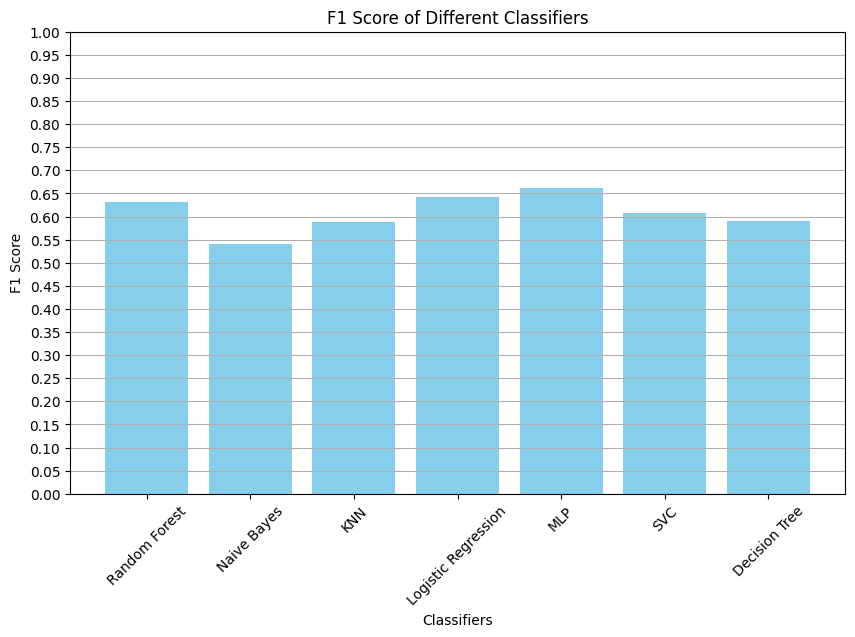

In [437]:
import matplotlib.pyplot as plt

classifiers = ['Random Forest', 'Naive Bayes', 'KNN', 'Logistic Regression', 'MLP', 'SVC', 'Decision Tree']
f1_score = [rf_f1_score,nb_f1_score,knn_f1_score,lr_f1_score,mlp_f1_score,svc_f1_score,dt_f1_score]

plt.figure(figsize=(10, 6))
plt.bar(classifiers, f1_score, color='skyblue')
plt.xlabel('Classifiers')
plt.ylabel('F1 Score')
plt.title('F1 Score of Different Classifiers')
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.yticks([i/20 for i in range(21)]) # anevainei ana 0.05 o y
plt.grid(axis='y')

plt.show()

### 7. Προετοιμασία αρχείου για τη δεύτερη υποβολή στο kaggle

7.α. Χρησιμοποιήστε **ΜΟΝΟ** το μοντέλο σας με την καλύτερη επίδοση για να κάνετε προβλέψεις χρησιμοποιώντας το δοθέν σύνολο εκπαίδευσης (test set)

In [438]:
test = pd.read_csv('test.csv')

# morfopoihsh tou test wste na exei thn idia morfh me to test
#df['Date'] = pd.to_datetime(df['Date']) #
#df['Month'] = df['Date'].dt.month # kaname correlation_matrix gia to month kai den ephrreaze shmantika to Raintomorrow, opote kaname drop
test.drop(['MinTemp','Temp9am','Date'], axis=1, inplace=True) # η συσχετιση σε σχεση με το RainTomorrow ειναι πολυ μικρη
test['AvgMaxTemp'] = test[['MaxTemp', 'Temp3pm']].mean(axis=1) # κανω συνενωση το average των MaxTemp και Temp3pm
test.drop(['MaxTemp','Temp3pm'], axis=1, inplace=True) # σβηνω τα Temp3pm, MaxTemp, αρα μενει μονο το AvgMaxTemp


# handle numeric features
numeric_features = test.select_dtypes(include=['number']).columns
numeric_features = numeric_features.drop(['RainToday'])
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median'))
    ,('scaler', StandardScaler())])               # 3.δ) κλιμάκωση

# handle categorical features
categorical_features = test.select_dtypes(include=['object']).columns
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')), # 3.β) ii) απουσιάζουσες τιμές
    ('scaler', OneHotEncoder(handle_unknown='ignore'))])  # 3.γ) μετατροπή των κατηγορικών μεταβλητών

# Create a transformer
preprocessor = ColumnTransformer( # 3.ε)
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)]
        , remainder='passthrough'  # Handle columns not specified in transformers
    )

# Fit and transform the data
test_transformed = preprocessor.fit_transform(test) # 3.ε)

# Now, df_transformed contains the transformed data without the need for np.array conversion

# Retrieve feature names after transformation
feature_names = preprocessor.get_feature_names_out()

# Convert the sparse matrix to a DataFrame
test_transformed_dense = pd.DataFrame(test_transformed.toarray(), columns=feature_names) # 3.ε)

y_test_pred_mlp = mlp_classifier.predict(test_transformed_dense)
print("\nmlp - predictions made")


mlp - predictions made


7.β. Αποθηκεύστε τις προβλέψεις από το καλύτερο μοντέλο σας σε ένα csv αρχείο. To csv αρχείο θα πρέπει να είναι περιέχει 2 στήλες: η πρώτη στήλη να περιέχει την στήλη id του test set file και η δεύτερη στήλη τις αντίστοιχες προβλέψεις που έκανε το καλύτερα εκπαιδευμένο μοντέλο σας (βήμα 7α).

In [439]:
# Create a new DataFrame 'ID' with the 'RainTomorrow' column
ID_df = pd.DataFrame({'id': range(1, len(y_test_pred_mlp) + 1), 'RainTomorrow': y_test_pred_mlp})

ID_df.info()

ID_df.to_csv('final_output.csv',index=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9699 entries, 0 to 9698
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            9699 non-null   int64  
 1   RainTomorrow  9699 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 151.7 KB
